In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn.whitegrid')

In [2]:
url = 'https://bit.ly/HDSC-StageOneDataset'
fuel_data = pd.read_csv(url)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2011_12_146_0_6,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [4]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [6]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [7]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [8]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [9]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [10]:
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df1.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [11]:
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
fuel_df2.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_2009_12_79_0_2,79,2009,montrose,oil,bbl,22912.0,5.770422,65.443,67.540,11.341
1,f1_fuel_2009_12_79_0_4,79,2009,hawthorn 5,coal,ton,2408123.0,16.782000,18.598,18.310,1.108
2,f1_fuel_2009_12_79_0_5,79,2009,hawthorn 5,gas,mcf,82141.0,1.000000,6.238,6.238,6.238
3,f1_fuel_2009_12_79_0_7,79,2009,hawthorn 6 & 9,gas,mcf,1701680.0,1.000000,4.885,4.885,4.885
4,f1_fuel_2009_12_79_0_10,79,2009,hawthorn 7 & 8,gas,mcf,82601.0,1.000000,5.383,5.383,5.383


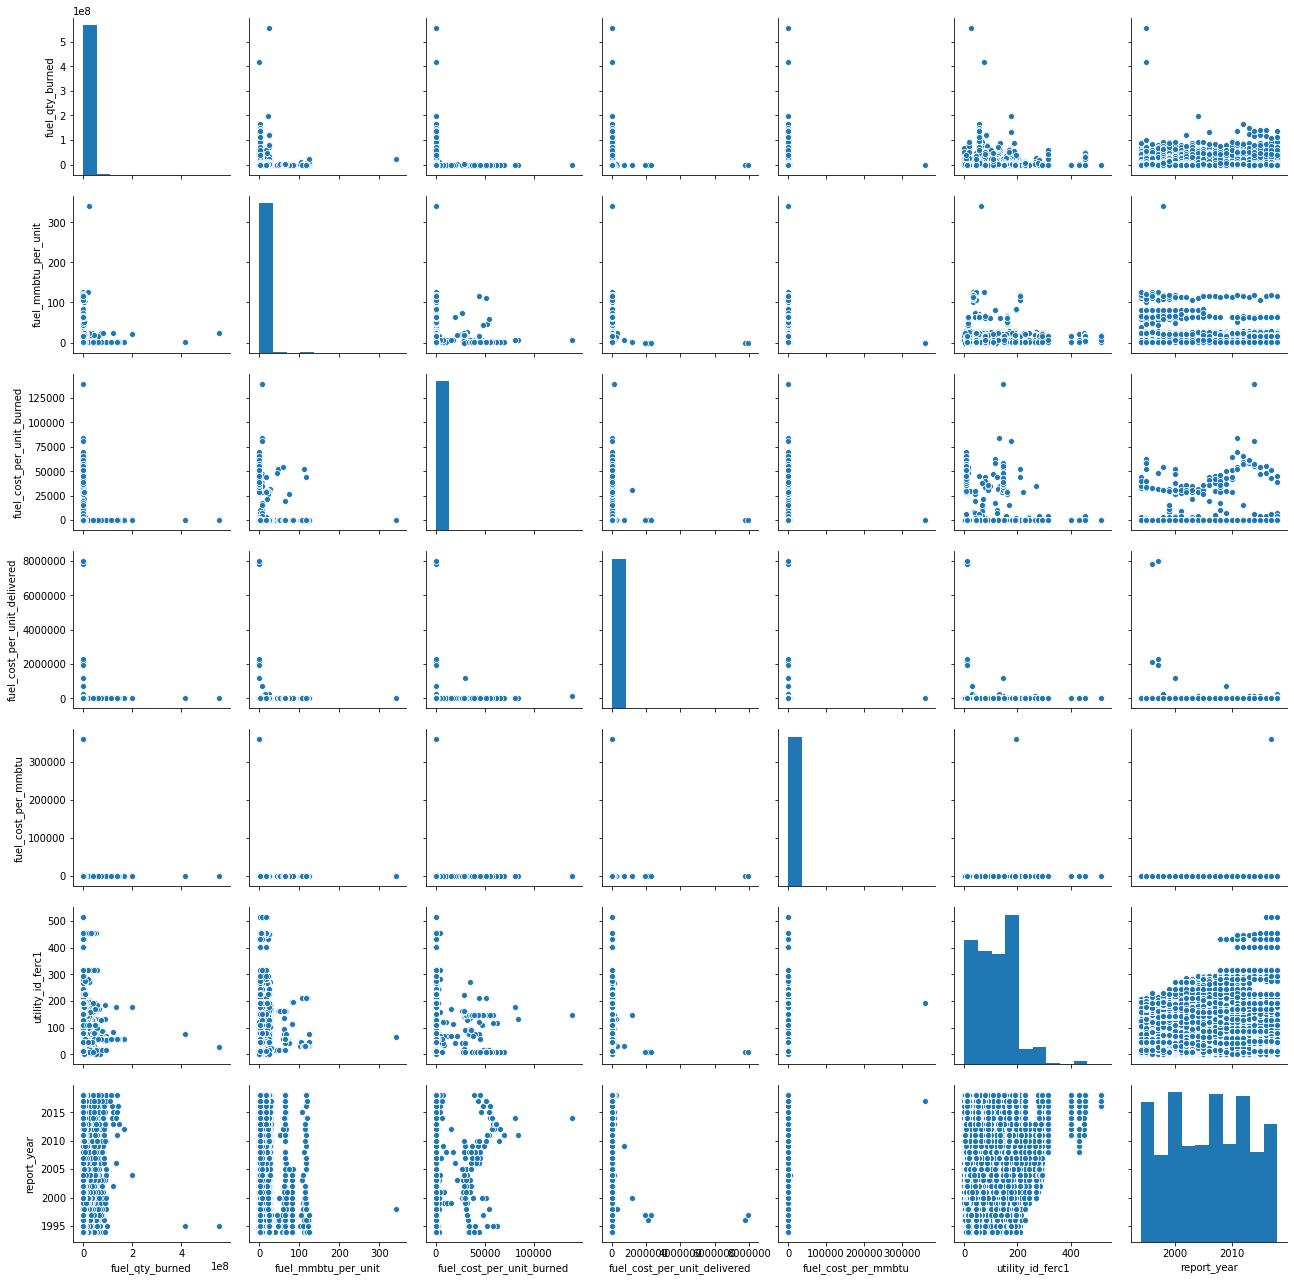

In [129]:
x = fuel_data[['fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu', 'utility_id_ferc1', 'report_year']]
sb.pairplot(x)

In [130]:
corr = x.corr()
corr

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,utility_id_ferc1,report_year
fuel_qty_burned,1.000000,-0.080946,-0.018535,-0.003551,-0.001896,-0.057447,0.012952
fuel_mmbtu_per_unit,-0.080946,1.000000,-0.010034,-0.009039,-0.005884,-0.066946,-0.110853
fuel_cost_per_unit_burned,-0.018535,-0.010034,1.000000,0.011007,-0.000437,-0.037863,0.013599
fuel_cost_per_unit_delivered,-0.003551,-0.009039,0.011007,1.000000,-0.000109,-0.016414,-0.014043
fuel_cost_per_mmbtu,-0.001896,-0.005884,-0.000437,-0.000109,1.000000,0.006122,0.010261
utility_id_ferc1,-0.057447,-0.066946,-0.037863,-0.016414,0.006122,1.000000,0.093323
report_year,0.012952,-0.110853,0.013599,-0.014043,0.010261,0.093323,1.000000


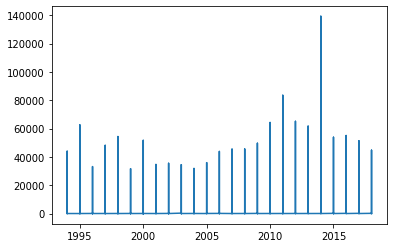

In [37]:
x = fuel_data['report_year']
y = fuel_data['fuel_cost_per_unit_burned']
plt.plot(x,y)

In [42]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].mean()[0:]

report_year
1994    213.191996
1995    354.422555
1996     79.434995
1997    149.482132
1998    126.683519
1999    120.053605
2000    237.797111
2001    133.013010
2002    101.179365
2003    123.183919
2004    154.897398
2005    107.111221
2006    151.361249
2007    202.622082
2008    255.954415
2009    215.699318
2010    262.951203
2011    301.754519
2012    258.804138
2013    255.991023
2014    442.359068
2015    237.933197
2016    247.083959
2017    246.281796
2018    232.992036
Name: fuel_cost_per_unit_burned, dtype: float64

In [123]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()[0:]

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [60]:
fuel_costs = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()
fuel_costs

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [95]:
fuel_costss = pd.DataFrame(fuel_data[['report_year', 'fuel_type_code_pudl', 'fuel_cost_per_unit_burned']])
fuel_costss

,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,1994,coal,18.59
1,1994,coal,18.58
2,1994,coal,39.72
3,1994,coal,47.21
4,1994,gas,2.77
...,...,...,...
29518,2018,gas,4.78
29519,2018,gas,3.65
29520,2018,gas,4.77
29521,2018,coal,3.06


In [105]:
year_value = fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].sum()
year_value

report_year
1994    263292.115
1995    425661.488
1996     86425.275
1997    163533.452
1998    140238.656
1999    126056.285
2000    326495.434
2001    180365.641
2002    121921.135
2003    149175.726
2004    184637.699
2005    135924.139
2006    188142.032
2007    256114.312
2008    314312.022
2009    263584.566
2010    331581.467
2011    374175.603
2012    321693.544
2013    306933.236
2014    518002.469
2015    260060.984
2016    255484.814
2017    244557.823
2018    221575.426
Name: fuel_cost_per_unit_burned, dtype: float64

In [119]:
year_value2 = fuel_data.groupby(['report_year', 'fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()
year_value2

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
                                       ...    
2018         coal                     9488.197
             gas                      4322.494
             nuclear                173267.161
             oil                     33836.602
             waste                     660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [133]:
report_year_1998, report_year_1994 = year_value2.loc[[1998, 1994], 'coal']
percent_change = ((report_year_1998 - report_year_1994)/ report_year_1994) * 100
percent_change

25.89329874816391

In [111]:
fuel_qty = fuel_data['fuel_qty_burned']
fuel_qty

0         5377489.0
1        10486945.0
2         2978683.0
3         3739484.0
4           40533.0
            ...    
29518       18799.0
29519      806730.0
29520      104554.0
29521      315945.0
29522       17853.0
Name: fuel_qty_burned, Length: 29523, dtype: float64

In [117]:
round(fuel_qty.skew(),2)

15.85

In [118]:
round(fuel_qty.kurtosis(),2)

651.37

In [134]:
std_dev = fuel_data['fuel_mmbtu_per_unit'].std()
std_dev

10.600220307806886

In [135]:
percentile = fuel_data['fuel_mmbtu_per_unit'].quantile(q=0.75)
percentile

17.006